In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [6]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [8]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [46]:
from sklearn.manifold import TSNE

In [47]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [48]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

/home/valentin/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [49]:
X_train_tsne.shape

(404, 2)

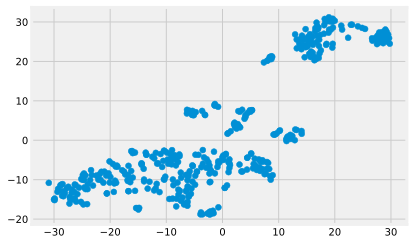

In [50]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Task 2

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters = 2, max_iter = 100, random_state = 42)

In [53]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    266
1    138
dtype: int64

In [54]:
labels_test = kmeans.predict(X_test_scaled)

Text(17, 15, 'Claster 1')

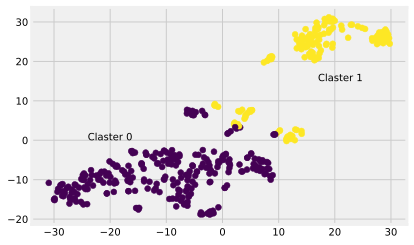

In [58]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.text(-24, 0, 'Claster 0')
plt.text(17, 15, 'Claster 1')

In [59]:
y_train.mean()

22.796534653465343

In [61]:
y_train[labels_train == 0].mean()

26.066541353383457

In [62]:
y_train[labels_train == 1].mean()

16.493478260869566

Text(0.5, 0, 'Price')

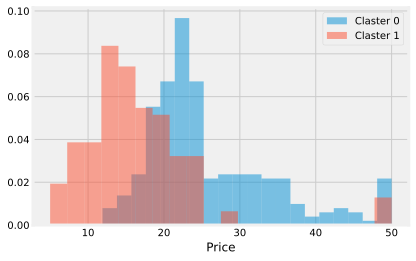

In [63]:
plt.hist(y_train[labels_train == 0], bins = 20,  density = True, alpha = 0.5)
plt.hist(y_train[labels_train == 1], bins = 20,  density = True, alpha = 0.5)
plt.legend(['Claster 0', 'Claster 1'])
plt.xlabel('Price')

In [64]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.2766786090225563

In [65]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.03253507246377

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

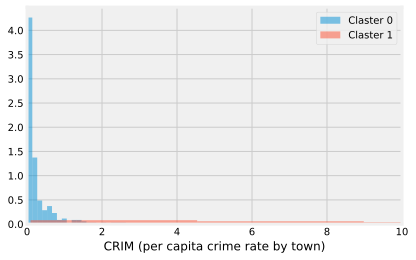

In [75]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.xlim(0, 10)
plt.legend(['Claster 0', 'Claster 1'])
plt.xlabel('CRIM (per capita crime rate by town)')

In [67]:
### Task 3

In [68]:
labels_test = kmeans.predict(X_test_scaled)

In [69]:
y_test.mean()

21.488235294117644

In [70]:
y_test[labels_test == 0].mean()

24.412698412698415

In [71]:
y_test[labels_test == 1].mean()

16.764102564102565

Text(0.5, 0, 'Price')

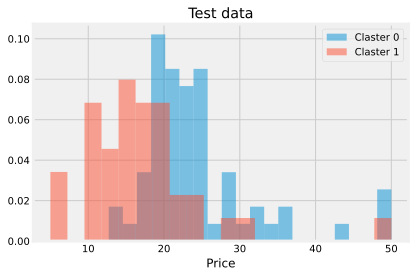

In [72]:
plt.hist(y_test[labels_test == 0], bins = 20, density = True, alpha = 0.5)
plt.hist(y_test[labels_test == 1], bins = 20, density = True, alpha = 0.5)
plt.title('Test data')
plt.legend(['Claster 0', 'Claster 1'])
plt.xlabel('Price')

In [73]:
X_test.loc[labels_test == 0, 'CRIM'].mean()

0.19570111111111108

In [74]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

9.180189743589745

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

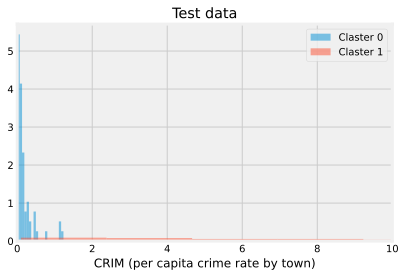

In [77]:
plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.hist(X_test.loc[labels_test == 1, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.xlim(0, 10)
plt.title('Test data')
plt.legend(['Claster 0', 'Claster 1'])
plt.xlabel('CRIM (per capita crime rate by town)')